This code is to calculate the model performances and create the visualisation to present the results.

In [2]:
import pandas as pd
import glob
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pickle

In [3]:
data_types = ['EDA', 'EEG', 'PUPIL', 'GAZE', 'MOTION',]
target_name = 'stage'
target_set = ['IN', 'QF', 'TYPE', 'SPEAK', 'LISTEN','READ',]
taget_labels = ['IN', 'QF', 'QS-T', 'QS-S', 'RJ-L', 'RJ-R']

## single sensor group

In [4]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

def load_data(folder, tw='*'):
    clfs = dict()
    for dt in data_types:
        file = glob.glob(f'models/{folder}/*(6)-{tw}-{dt}-*')
        if len(file) == 0: continue
        else:
            file = file[0]
        print(file)
        clf = pickle.load(open(file, 'rb'))
        clfs.update({dt: clf})
    return clfs


def load_scores(clfs, label):
    scores = dict()
    for key, clf in clfs.items():
        score = pd.DataFrame(
            {
                'test_Precision': clf['test_Precision'],
                'train_Precision': clf['train_Precision'],
                'test_Recall': clf['test_Recall'],
                'train_Recall': clf['train_Recall'],
                'test_Accuracy': clf['test_Accuracy'],
                'train_Accuracy': clf['train_Accuracy'],
                'test_F1-macro': clf['test_F1-macro'], 
                'train_F1-macro': clf['train_F1-macro']
            }
        )
        scores.update({key: score})

    avgs = []
    for key, val in scores.items():
        val['data'] = key
        avgs.append(val)
    avgs = pd.concat(avgs)
    avgs['tw'] = label
    return scores, avgs


def load_predictions(clf):
    y_pred = []
    for a in clf['y_pred']: 
        for i in a:
            y_pred.append(i)
            
    y_true = []
    for b in clf['y_true']: 
        for c in b:
            y_true.append(c)
    print('y_pred size:', len(y_pred), 'y_true size:', len(y_true))
    return y_pred, y_true


def plot_cm(clfs, target_labels, tw, out=None):
    _, ax= plt.subplots(ncols=5, figsize=(11,6), sharex=True, sharey=True)
    
    for n, data_type in enumerate(data_types):
        clf = clfs[data_type]
        y_score, y_true = load_predictions(clf)
        labels = np.unique(y_true)
                
        cmm = confusion_matrix(y_true, y_score, labels=labels)
        disp = ConfusionMatrixDisplay(confusion_matrix=cmm,
                                      display_labels=labels)
        
        disp.plot(ax=ax[n], cmap=plt.cm.Blues, values_format='d', colorbar=False, im_kw={}, text_kw={'fontsize': 10})

        ax[n].set_title(f"{data_type}({tw})")
        ax[n].set_yticklabels(target_labels, fontsize=9)
        ax[n].set_xticklabels(target_labels, fontsize=9)
    
        if n > 0: ax[n].set_ylabel(None)
        
        
    plt.tight_layout()
    if out:
        plt.savefig(out, bbox_inches='tight')
    plt.show()

In [5]:
folder = '(v3)30_04_2025-07_11_PM'
clfs = load_data(folder, tw='4-2')
# print(clfs['EDA'].keys())
scores, avgs = load_scores(clfs, '4-2')
avgs

models/(v3)30_04_2025-07_11_PM/SVM(6)-4-2-EDA-30_04_2025-07_12_PM.pkl
models/(v3)30_04_2025-07_11_PM/SVM(6)-4-2-EEG-30_04_2025-07_11_PM.pkl
models/(v3)30_04_2025-07_11_PM/SVM(6)-4-2-PUPIL-30_04_2025-07_12_PM.pkl
models/(v3)30_04_2025-07_11_PM/SVM(6)-4-2-GAZE-30_04_2025-07_12_PM.pkl
models/(v3)30_04_2025-07_11_PM/SVM(6)-4-2-MOTION-30_04_2025-07_11_PM.pkl


,test_Precision,train_Precision,test_Recall,train_Recall,test_Accuracy,train_Accuracy,test_F1-macro,train_F1-macro,data,tw
0,0.087087,0.336362,0.136364,0.249719,0.204545,0.331467,0.087827,0.223071,EDA,4-2
1,0.169474,0.480290,0.208333,0.247312,0.270833,0.327334,0.179931,0.219111,EDA,4-2
2,0.384259,0.477901,0.345455,0.237523,0.409091,0.321389,0.297591,0.201327,EDA,4-2
3,0.231352,0.488156,0.263889,0.238258,0.375000,0.318335,0.215000,0.205612,EDA,4-2
4,0.104978,0.482893,0.194444,0.240417,0.291667,0.321710,0.130769,0.209509,EDA,4-2
...,...,...,...,...,...,...,...,...,...,...
15,0.513492,0.583204,0.500000,0.514129,0.541667,0.560180,0.475021,0.503993,MOTION,4-2
16,0.352910,0.588792,0.388889,0.517270,0.375000,0.562430,0.361098,0.507441,MOTION,4-2
17,0.459583,0.589106,0.402778,0.504356,0.458333,0.550056,0.369691,0.495223,MOTION,4-2
18,0.446047,0.586075,0.472222,0.503678,0.479167,0.546682,0.449663,0.494532,MOTION,4-2


In [6]:
avgs.groupby(['data', 'tw']).mean().round(3)

,,test_Precision,train_Precision,test_Recall,train_Recall,test_Accuracy,train_Accuracy,test_F1-macro,train_F1-macro
data,tw,,,,,,,,
EDA,4-2,0.172,0.450,0.207,0.246,0.282,0.327,0.146,0.216
EEG,4-2,0.295,0.978,0.318,0.960,0.328,0.966,0.252,0.967
GAZE,4-2,0.333,0.801,0.328,0.730,0.403,0.772,0.299,0.742
MOTION,4-2,0.446,0.591,0.461,0.513,0.506,0.556,0.424,0.501
PUPIL,4-2,0.630,0.725,0.604,0.715,0.585,0.703,0.574,0.716


y_pred size: 937 y_true size: 937
y_pred size: 935 y_true size: 935
y_pred size: 833 y_true size: 833
y_pred size: 805 y_true size: 805
y_pred size: 937 y_true size: 937


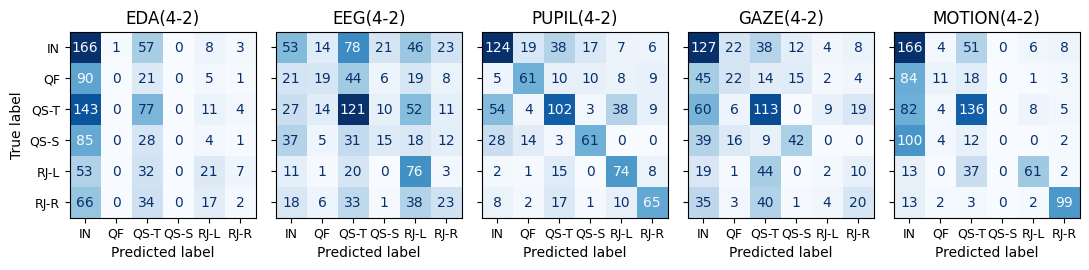

In [7]:
plot_cm(clfs, ['IN', 'QF','QS-T', 'QS-S', 'RJ-L','RJ-R', ], '4-2', 'images/CM-prediction-4-2.pdf')

In [8]:
clfs2 = load_data(folder, '2-1')
print(clfs2['EDA'].keys())
scores2, avgs2 = load_scores(clfs2, '2-1')
avgs = pd.concat([avgs, avgs2])
avgs

models/(v3)30_04_2025-07_11_PM/SVM(6)-2-1-EDA-30_04_2025-07_12_PM.pkl
models/(v3)30_04_2025-07_11_PM/SVM(6)-2-1-EEG-30_04_2025-07_12_PM.pkl
models/(v3)30_04_2025-07_11_PM/SVM(6)-2-1-PUPIL-30_04_2025-07_12_PM.pkl
models/(v3)30_04_2025-07_11_PM/SVM(6)-2-1-GAZE-30_04_2025-07_12_PM.pkl
models/(v3)30_04_2025-07_11_PM/SVM(6)-2-1-MOTION-30_04_2025-07_12_PM.pkl
dict_keys(['fit_time', 'score_time', 'estimator', 'indices', 'test_ROC', 'train_ROC', 'test_Accuracy', 'train_Accuracy', 'test_F1-macro', 'train_F1-macro', 'test_Precision', 'train_Precision', 'test_Recall', 'train_Recall', 'y_pred', 'y_true', 'test_group', 'y_train', 'train_group'])


,test_Precision,train_Precision,test_Recall,train_Recall,test_Accuracy,train_Accuracy,test_F1-macro,train_F1-macro,data,tw
0,0.087087,0.336362,0.136364,0.249719,0.204545,0.331467,0.087827,0.223071,EDA,4-2
1,0.169474,0.480290,0.208333,0.247312,0.270833,0.327334,0.179931,0.219111,EDA,4-2
2,0.384259,0.477901,0.345455,0.237523,0.409091,0.321389,0.297591,0.201327,EDA,4-2
3,0.231352,0.488156,0.263889,0.238258,0.375000,0.318335,0.215000,0.205612,EDA,4-2
4,0.104978,0.482893,0.194444,0.240417,0.291667,0.321710,0.130769,0.209509,EDA,4-2
...,...,...,...,...,...,...,...,...,...,...
15,0.559325,0.706000,0.527778,0.616208,0.541667,0.650224,0.520924,0.632617,MOTION,2-1
16,0.478558,0.824487,0.333333,0.767374,0.354167,0.778027,0.341765,0.788067,MOTION,2-1
17,0.408135,0.615957,0.361111,0.535158,0.375000,0.568386,0.347449,0.536109,MOTION,2-1
18,0.553268,0.639270,0.388889,0.568954,0.416667,0.605381,0.360037,0.570048,MOTION,2-1


y_pred size: 940 y_true size: 940
y_pred size: 940 y_true size: 940
y_pred size: 840 y_true size: 840
y_pred size: 830 y_true size: 830
y_pred size: 940 y_true size: 940


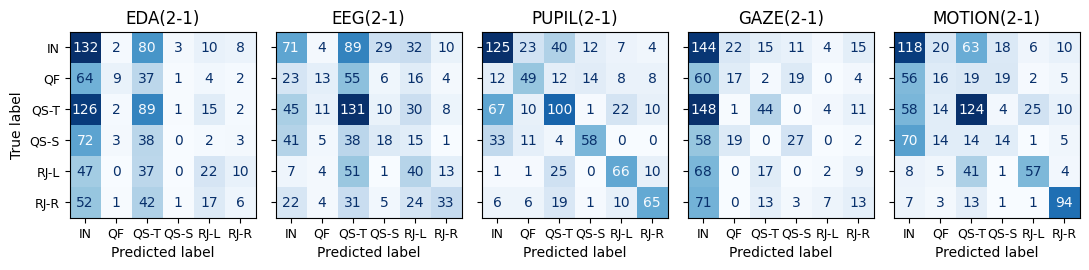

In [9]:
plot_cm(clfs2, ['IN', 'QF','QS-T', 'QS-S', 'RJ-L','RJ-R', ], '2-1', 'images/CM-prediction-2-1.pdf')

In [10]:
clfs3 = load_data(folder, '1-0')
print(clfs3['EDA'].keys())
scores3, avgs3 = load_scores(clfs2, '1-0')
avgs = pd.concat([avgs, avgs3])
avgs

models/(v3)30_04_2025-07_11_PM/SVM(6)-1-0-EDA-30_04_2025-07_11_PM.pkl
models/(v3)30_04_2025-07_11_PM/SVM(6)-1-0-EEG-30_04_2025-07_11_PM.pkl
models/(v3)30_04_2025-07_11_PM/SVM(6)-1-0-PUPIL-30_04_2025-07_11_PM.pkl
models/(v3)30_04_2025-07_11_PM/SVM(6)-1-0-GAZE-30_04_2025-07_11_PM.pkl
models/(v3)30_04_2025-07_11_PM/SVM(6)-1-0-MOTION-30_04_2025-07_11_PM.pkl
dict_keys(['fit_time', 'score_time', 'estimator', 'indices', 'test_ROC', 'train_ROC', 'test_Accuracy', 'train_Accuracy', 'test_F1-macro', 'train_F1-macro', 'test_Precision', 'train_Precision', 'test_Recall', 'train_Recall', 'y_pred', 'y_true', 'test_group', 'y_train', 'train_group'])


,test_Precision,train_Precision,test_Recall,train_Recall,test_Accuracy,train_Accuracy,test_F1-macro,train_F1-macro,data,tw
0,0.087087,0.336362,0.136364,0.249719,0.204545,0.331467,0.087827,0.223071,EDA,4-2
1,0.169474,0.480290,0.208333,0.247312,0.270833,0.327334,0.179931,0.219111,EDA,4-2
2,0.384259,0.477901,0.345455,0.237523,0.409091,0.321389,0.297591,0.201327,EDA,4-2
3,0.231352,0.488156,0.263889,0.238258,0.375000,0.318335,0.215000,0.205612,EDA,4-2
4,0.104978,0.482893,0.194444,0.240417,0.291667,0.321710,0.130769,0.209509,EDA,4-2
...,...,...,...,...,...,...,...,...,...,...
15,0.559325,0.706000,0.527778,0.616208,0.541667,0.650224,0.520924,0.632617,MOTION,1-0
16,0.478558,0.824487,0.333333,0.767374,0.354167,0.778027,0.341765,0.788067,MOTION,1-0
17,0.408135,0.615957,0.361111,0.535158,0.375000,0.568386,0.347449,0.536109,MOTION,1-0
18,0.553268,0.639270,0.388889,0.568954,0.416667,0.605381,0.360037,0.570048,MOTION,1-0


In [11]:
avgs['group'] = avgs[['data', 'tw']].apply(lambda x: f'{x[0]}({x[1]})', axis=1)
avgs

/tmp/ipykernel_48394/910883719.py:1: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  avgs['group'] = avgs[['data', 'tw']].apply(lambda x: f'{x[0]}({x[1]})', axis=1)


,test_Precision,train_Precision,test_Recall,train_Recall,test_Accuracy,train_Accuracy,test_F1-macro,train_F1-macro,data,tw,group
0,0.087087,0.336362,0.136364,0.249719,0.204545,0.331467,0.087827,0.223071,EDA,4-2,EDA(4-2)
1,0.169474,0.480290,0.208333,0.247312,0.270833,0.327334,0.179931,0.219111,EDA,4-2,EDA(4-2)
2,0.384259,0.477901,0.345455,0.237523,0.409091,0.321389,0.297591,0.201327,EDA,4-2,EDA(4-2)
3,0.231352,0.488156,0.263889,0.238258,0.375000,0.318335,0.215000,0.205612,EDA,4-2,EDA(4-2)
4,0.104978,0.482893,0.194444,0.240417,0.291667,0.321710,0.130769,0.209509,EDA,4-2,EDA(4-2)
...,...,...,...,...,...,...,...,...,...,...,...
15,0.559325,0.706000,0.527778,0.616208,0.541667,0.650224,0.520924,0.632617,MOTION,1-0,MOTION(1-0)
16,0.478558,0.824487,0.333333,0.767374,0.354167,0.778027,0.341765,0.788067,MOTION,1-0,MOTION(1-0)
17,0.408135,0.615957,0.361111,0.535158,0.375000,0.568386,0.347449,0.536109,MOTION,1-0,MOTION(1-0)
18,0.553268,0.639270,0.388889,0.568954,0.416667,0.605381,0.360037,0.570048,MOTION,1-0,MOTION(1-0)


In [12]:
avgs.drop(columns=['data', 'tw']).groupby('group').mean().round(2)

,test_Precision,train_Precision,test_Recall,train_Recall,test_Accuracy,train_Accuracy,test_F1-macro,train_F1-macro
group,,,,,,,,
EDA(1-0),0.21,0.75,0.21,0.41,0.27,0.47,0.17,0.43
EDA(2-1),0.21,0.75,0.21,0.41,0.27,0.47,0.17,0.43
EDA(4-2),0.17,0.45,0.21,0.25,0.28,0.33,0.15,0.22
EEG(1-0),0.31,0.97,0.29,0.95,0.32,0.96,0.25,0.96
EEG(2-1),0.31,0.97,0.29,0.95,0.32,0.96,0.25,0.96
EEG(4-2),0.29,0.98,0.32,0.96,0.33,0.97,0.25,0.97
GAZE(1-0),0.21,0.92,0.24,0.89,0.30,0.91,0.19,0.90
GAZE(2-1),0.21,0.92,0.24,0.89,0.30,0.91,0.19,0.90
GAZE(4-2),0.33,0.80,0.33,0.73,0.40,0.77,0.30,0.74


In [13]:
avgs.drop(columns=['data', 'tw']).groupby('group').std().round(2)

,test_Precision,train_Precision,test_Recall,train_Recall,test_Accuracy,train_Accuracy,test_F1-macro,train_F1-macro
group,,,,,,,,
EDA(1-0),0.11,0.01,0.06,0.01,0.07,0.01,0.07,0.01
EDA(2-1),0.11,0.01,0.06,0.01,0.07,0.01,0.07,0.01
EDA(4-2),0.09,0.07,0.06,0.00,0.07,0.00,0.07,0.01
EEG(1-0),0.13,0.01,0.10,0.01,0.09,0.01,0.12,0.01
EEG(2-1),0.13,0.01,0.10,0.01,0.09,0.01,0.12,0.01
EEG(4-2),0.15,0.00,0.11,0.01,0.12,0.01,0.13,0.01
GAZE(1-0),0.17,0.06,0.12,0.08,0.12,0.07,0.14,0.08
GAZE(2-1),0.17,0.06,0.12,0.08,0.12,0.07,0.14,0.08
GAZE(4-2),0.16,0.13,0.11,0.17,0.10,0.15,0.13,0.17


In [14]:
mm = avgs.drop(columns=['tw']).melt(['group', 'data'])
mm['score'] = [v.split('_')[1] for v in mm['variable']]
mm['cond'] = [v.split('_')[0] for v in mm['variable']]
mm = mm[(mm.score.isin(['Accuracy', 'F1-macro'])) & (mm.cond == 'test')]
mm

,group,data,variable,value,score,cond
1152,EDA(4-2),EDA,test_Accuracy,0.204545,Accuracy,test
1153,EDA(4-2),EDA,test_Accuracy,0.270833,Accuracy,test
1154,EDA(4-2),EDA,test_Accuracy,0.409091,Accuracy,test
1155,EDA(4-2),EDA,test_Accuracy,0.375000,Accuracy,test
1156,EDA(4-2),EDA,test_Accuracy,0.291667,Accuracy,test
...,...,...,...,...,...,...
2011,MOTION(1-0),MOTION,test_F1-macro,0.520924,F1-macro,test
2012,MOTION(1-0),MOTION,test_F1-macro,0.341765,F1-macro,test
2013,MOTION(1-0),MOTION,test_F1-macro,0.347449,F1-macro,test
2014,MOTION(1-0),MOTION,test_F1-macro,0.360037,F1-macro,test


In [64]:
mm[mm.score == 'F1-macro'].drop(columns=['data', 'variable', 'cond', 'score']).groupby('group').aggregate(['mean', 'std']).round(3).transpose()

group       EDA(1-0)  EDA(2-1)  EDA(4-2)  EEG(1-0)  EEG(2-1)  EEG(4-2)  \
value mean     0.170     0.170     0.146     0.246     0.246     0.252   
      std      0.067     0.067     0.067     0.116     0.116     0.128   

group       GAZE(1-0)  GAZE(2-1)  GAZE(4-2)  MOTION(1-0)  MOTION(2-1)  \
value mean      0.191      0.191      0.299        0.409        0.409   
      std       0.139      0.139      0.126        0.098        0.098   

group       MOTION(4-2)  PUPIL(1-0)  PUPIL(2-1)  PUPIL(4-2)  
value mean        0.424       0.530       0.530       0.574  
      std         0.071       0.153       0.153       0.152

In [65]:
mm[mm.score == 'Accuracy'].drop(columns=['data', 'variable', 'cond', 'score']).groupby('group').aggregate(['mean', 'std']).round(3).transpose()

group       EDA(1-0)  EDA(2-1)  EDA(4-2)  EEG(1-0)  EEG(2-1)  EEG(4-2)  \
value mean     0.273     0.273     0.282     0.324     0.324     0.328   
      std      0.065     0.065     0.067     0.092     0.092     0.118   

group       GAZE(1-0)  GAZE(2-1)  GAZE(4-2)  MOTION(1-0)  MOTION(2-1)  \
value mean      0.295      0.295      0.403        0.452        0.452   
      std       0.124      0.124      0.104        0.114        0.114   

group       MOTION(4-2)  PUPIL(1-0)  PUPIL(2-1)  PUPIL(4-2)  
value mean        0.506       0.549       0.549       0.585  
      std         0.077       0.145       0.145       0.151

/tmp/ipykernel_48394/4190974793.py:17: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(xticks, fontsize=9, rotation=13,ha='center')


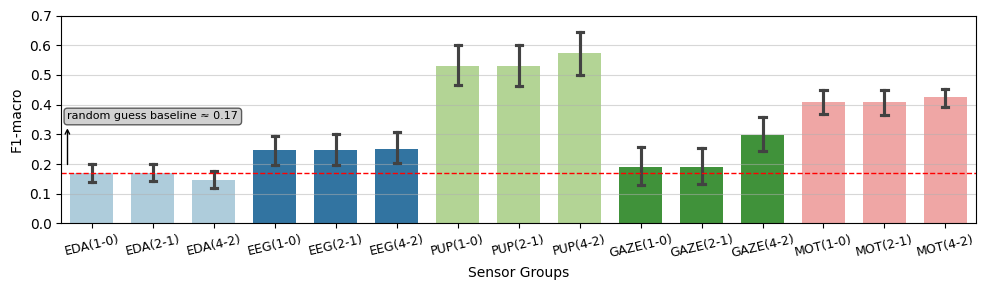

In [56]:
OUTPUT = 1

order=['EDA(1-0)', 'EDA(2-1)', 'EDA(4-2)', 'EEG(1-0)', 'EEG(2-1)', 'EEG(4-2)', \
       'PUPIL(1-0)', 'PUPIL(2-1)', 'PUPIL(4-2)', 'GAZE(1-0)', 'GAZE(2-1)', 'GAZE(4-2)', 'MOTION(1-0)', 'MOTION(2-1)', 'MOTION(4-2)', ]
xticks=['EDA(1-0)', 'EDA(2-1)', 'EDA(4-2)', 'EEG(1-0)', 'EEG(2-1)', 'EEG(4-2)', 'PUP(1-0)', 'PUP(2-1)', 'PUP(4-2)', \
        'GAZE(1-0)', 'GAZE(2-1)', 'GAZE(4-2)', 'MOT(1-0)', 'MOT(2-1)', 'MOT(4-2)', ]
w=0.7


_, ax =plt.subplots(figsize=(10,3))

sns.barplot(data=mm[mm.score == 'F1-macro'], x='group', y='value', hue='data', order=order, gap=0, palette="Paired",  errorbar=('ci', 95), capsize=0.1,
            ax=ax, width=w)
ax.grid(axis='y', alpha=0.5)
ax.set_xlabel('Sensor Groups')
ax.set_ylabel('F1-macro')
ax.set_xticklabels(xticks, fontsize=9, rotation=13,ha='center')
ax.legend().remove()
ax.set_yticks(np.arange(0, 1.1, 0.1))
ax.set_ylim(0,0.7)

plt.tight_layout()
ax.axhline(y=0.17, xmin=0, xmax=8, c='red', linewidth=1, linestyle='--')
ax.annotate(
    'random guess baseline ≈ 0.17',
    xy=(-0.4, 0.19), xycoords='data',
    xytext=(-0.4, 0.35), textcoords='data',
    arrowprops=dict(facecolor='black', arrowstyle='<-',connectionstyle='angle,angleA=0,angleB=-90,rad=0'),
    fontsize=8, color='black', bbox = dict(boxstyle="round", fc="0.7", alpha=0.6),
)

if OUTPUT:
    plt.savefig('images/classification_svm_6.pdf', bbox_inches='tight')
plt.show()

## Fusion models

In [87]:
import re

def load_fusion_data(folder, tw='*'):
    clfs = dict()
    files = glob.glob(f'models/{folder}/*(6)-{tw}-*')
    print(len(files), 'classifiers')
    for file in files:
        dt = re.match(r'(?:.+)FUSION\(\d\)-\d-\d-(([A-Z]+\+?){1,})(?:.+)', file).groups()[0]
        clf = pickle.load(open(file, 'rb'))
        clfs.update({dt: clf})
    return clfs


clfs = load_fusion_data('(fusion)30_04_2025-08_14_PM', tw='4-2')
print(clfs.keys())
scores, avgs = load_scores(clfs, '4-2')

avgs

26 classifiers
dict_keys(['EEG+MOTION+PUPIL+EDA', 'MOTION+PUPIL+GAZE', 'MOTION+EDA', 'EEG+PUPIL+GAZE', 'EEG+PUPIL', 'EEG+MOTION+PUPIL', 'EEG+MOTION+GAZE', 'EEG+MOTION+EDA', 'PUPIL+EDA', 'MOTION+EDA+GAZE', 'PUPIL+GAZE', 'MOTION+GAZE', 'EEG+PUPIL+EDA', 'EEG+PUPIL+EDA+GAZE', 'EEG+EDA+GAZE', 'MOTION+PUPIL+EDA', 'MOTION+PUPIL', 'MOTION+PUPIL+EDA+GAZE', 'EEG+GAZE', 'PUPIL+EDA+GAZE', 'EDA+GAZE', 'EEG+EDA', 'EEG+MOTION+EDA+GAZE', 'EEG+MOTION+PUPIL+GAZE', 'EEG+MOTION+PUPIL+EDA+GAZE', 'EEG+MOTION'])


,test_Precision,train_Precision,test_Recall,train_Recall,test_Accuracy,train_Accuracy,test_F1-macro,train_F1-macro,data,tw
0,0.315278,0.980476,0.416667,0.957373,0.428571,0.967047,0.350206,0.965918,EEG+MOTION+PUPIL+EDA,4-2
1,0.578571,0.983664,0.597222,0.967483,0.608696,0.973248,0.579513,0.973823,EEG+MOTION+PUPIL+EDA,4-2
2,0.599206,0.984702,0.614141,0.972601,0.568182,0.977128,0.577249,0.977758,EEG+MOTION+PUPIL+EDA,4-2
3,0.638264,0.984035,0.625000,0.971441,0.583333,0.975734,0.605716,0.976768,EEG+MOTION+PUPIL+EDA,4-2
4,0.425641,0.984180,0.377525,0.968958,0.319149,0.974490,0.328042,0.975352,EEG+MOTION+PUPIL+EDA,4-2
...,...,...,...,...,...,...,...,...,...,...
15,0.462963,0.964664,0.430556,0.910714,0.458333,0.932356,0.418193,0.919262,EEG+MOTION,4-2
16,0.334402,0.949843,0.416667,0.857143,0.425532,0.891892,0.324160,0.845480,EEG+MOTION,4-2
17,0.476496,0.950578,0.541667,0.860119,0.541667,0.894025,0.500952,0.850475,EEG+MOTION,4-2
18,0.533618,0.952077,0.500000,0.866071,0.520833,0.898534,0.487858,0.860075,EEG+MOTION,4-2


In [88]:
mm = avgs.melt(['data', 'tw'])
mm['score'] = [v.split('_')[1] for v in mm['variable']]
mm['cond'] = [v.split('_')[0] for v in mm['variable']]
mm['group'] = mm['data'].values
mm = mm[(mm.score.isin(['Accuracy', 'F1-macro'])) & (mm.cond == 'test')]
mm

,data,tw,variable,value,score,cond,group
1904,EEG+MOTION+PUPIL+EDA,4-2,test_Accuracy,0.428571,Accuracy,test,EEG+MOTION+PUPIL+EDA
1905,EEG+MOTION+PUPIL+EDA,4-2,test_Accuracy,0.608696,Accuracy,test,EEG+MOTION+PUPIL+EDA
1906,EEG+MOTION+PUPIL+EDA,4-2,test_Accuracy,0.568182,Accuracy,test,EEG+MOTION+PUPIL+EDA
1907,EEG+MOTION+PUPIL+EDA,4-2,test_Accuracy,0.583333,Accuracy,test,EEG+MOTION+PUPIL+EDA
1908,EEG+MOTION+PUPIL+EDA,4-2,test_Accuracy,0.319149,Accuracy,test,EEG+MOTION+PUPIL+EDA
...,...,...,...,...,...,...,...
3327,EEG+MOTION,4-2,test_F1-macro,0.418193,F1-macro,test,EEG+MOTION
3328,EEG+MOTION,4-2,test_F1-macro,0.324160,F1-macro,test,EEG+MOTION
3329,EEG+MOTION,4-2,test_F1-macro,0.500952,F1-macro,test,EEG+MOTION
3330,EEG+MOTION,4-2,test_F1-macro,0.487858,F1-macro,test,EEG+MOTION


Calculate the mean and standard deviation of the Accuracy and F1-macro for each data group.

In [89]:
result1 = mm[mm.score == 'Accuracy'].groupby(["group", "score"])['value'].aggregate([np.mean, np.std]).reset_index().sort_values('mean').round(3)
result2 = mm[mm.score == 'F1-macro'].groupby(["group", "score"])['value'].aggregate([np.mean, np.std]).reset_index().sort_values('mean').round(3)
result1.shape, result2.shape, result1.head(2)

/tmp/ipykernel_48394/2841722419.py:1: FutureWarning: The provided callable <function mean at 0x7f5b286bae80> is currently using SeriesGroupBy.mean. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass the string "mean" instead.
  result1 = mm[mm.score == 'Accuracy'].groupby(["group", "score"])['value'].aggregate([np.mean, np.std]).reset_index().sort_values('mean').round(3)
/tmp/ipykernel_48394/2841722419.py:1: FutureWarning: The provided callable <function std at 0x7f5b286bafc0> is currently using SeriesGroupBy.std. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass the string "std" instead.
  result1 = mm[mm.score == 'Accuracy'].groupby(["group", "score"])['value'].aggregate([np.mean, np.std]).reset_index().sort_values('mean').round(3)
/tmp/ipykernel_48394/2841722419.py:2: FutureWarning: The provided callable <function mean at 0x7f5b286bae80> is currently using SeriesGroupBy.mea

((26, 4),
 (26, 4),
       group     score   mean    std
 1   EEG+EDA  Accuracy  0.329  0.090
 0  EDA+GAZE  Accuracy  0.425  0.103)

In [90]:
result = result1.merge(result2, on='group', suffixes=('_ACC','_F1'))
result

,group,score_ACC,mean_ACC,std_ACC,score_F1,mean_F1,std_F1
0,EEG+EDA,Accuracy,0.329,0.090,F1-macro,0.234,0.099
1,EDA+GAZE,Accuracy,0.425,0.103,F1-macro,0.328,0.116
2,EEG+MOTION,Accuracy,0.452,0.114,F1-macro,0.396,0.121
3,EEG+MOTION+EDA,Accuracy,0.475,0.108,F1-macro,0.405,0.107
4,MOTION+EDA,Accuracy,0.484,0.075,F1-macro,0.417,0.076
5,EEG+GAZE,Accuracy,0.490,0.124,F1-macro,0.430,0.123
6,PUPIL+EDA,Accuracy,0.520,0.104,F1-macro,0.502,0.106
7,EEG+EDA+GAZE,Accuracy,0.525,0.135,F1-macro,0.458,0.148
8,MOTION+GAZE,Accuracy,0.529,0.116,F1-macro,0.484,0.121
9,EEG+PUPIL+EDA,Accuracy,0.535,0.141,F1-macro,0.499,0.147


In [91]:
result.to_csv('results/fusion_classficiation_results.csv', index=False)

To clean and replace the tick labels for better visualisation. 

In [92]:
fusion_dict = {
    'EEG+EDA': 'EDA+\nEEG',
    'EEG+PUPIL': 'EEG+\nPUP',
    'PUPIL+EDA': 'EDA+\nPUP',
    'MOTION+GAZE': 'MOT+\nGAZ',
    'MOTION+PUPIL': 'PUP+\nMOT',
    'EEG+MOTION': 'EEG+\nMOT',
    'MOTION+EDA': 'EDA+\nMOT',
    'EEG+GAZE': 'EEG+\nGAZ',
    'EDA+GAZE': 'EDA+\nGAZE',
    'PUPIL+GAZE': 'PUP+\nGAZ',
    'EEG+PUPIL+EDA': 'EDA+\nEEG+\nPUP',
    'EEG+MOTION+GAZE': 'EEG+\nMOT+\nGAZ',
    'EEG+EDA+GAZE': 'EDA+\nEEG+\nGAZ',
    'PUPIL+EDA+GAZE': 'EDA+\nPUP+\nGAZ',
    'EEG+MOTION+EDA': 'EDA+\nEEG+\nMOT',
    'EEG+PUPIL+GAZE': 'EEG+\nPUP+\nGAZ',
    'MOTION+PUPIL+GAZE': 'PUP+\nMOT+\nGAZ',
    'EEG+MOTION+PUPIL': 'EEG+\nPUP+\nMOT',
    'MOTION+PUPIL+EDA': 'EDA+\nPUP+\nMOT',
    'MOTION+EDA+GAZE': 'EDA+\nMOT+\nGAZ',
    'EEG+PUPIL+EDA+GAZE': 'EDA+\nEEG+\nPUP+\nGAZ',
    'EEG+MOTION+PUPIL+EDA': 'EDA+\nEEG+\nPUP+\nMOT',
    'EEG+MOTION+EDA+GAZE': 'EDA+\nEEG+\nMOT+\nGAZ',
    'MOTION+PUPIL+EDA+GAZE': 'EDA+\nPUP+\nMOT+\nGAZ',
    'EEG+MOTION+PUPIL+GAZE': 'EEG+\nPUP+\nMOT+\nGAZ',
    'EEG+MOTION+PUPIL+EDA+GAZE': 'EDA+\nEEG+\nPUP+\nMOT+\nGAZ'
}

In [93]:
mm.replace(fusion_dict, inplace=True)
mm

,data,tw,variable,value,score,cond,group
1904,EDA+\nEEG+\nPUP+\nMOT,4-2,test_Accuracy,0.428571,Accuracy,test,EDA+\nEEG+\nPUP+\nMOT
1905,EDA+\nEEG+\nPUP+\nMOT,4-2,test_Accuracy,0.608696,Accuracy,test,EDA+\nEEG+\nPUP+\nMOT
1906,EDA+\nEEG+\nPUP+\nMOT,4-2,test_Accuracy,0.568182,Accuracy,test,EDA+\nEEG+\nPUP+\nMOT
1907,EDA+\nEEG+\nPUP+\nMOT,4-2,test_Accuracy,0.583333,Accuracy,test,EDA+\nEEG+\nPUP+\nMOT
1908,EDA+\nEEG+\nPUP+\nMOT,4-2,test_Accuracy,0.319149,Accuracy,test,EDA+\nEEG+\nPUP+\nMOT
...,...,...,...,...,...,...,...
3327,EEG+\nMOT,4-2,test_F1-macro,0.418193,F1-macro,test,EEG+\nMOT
3328,EEG+\nMOT,4-2,test_F1-macro,0.324160,F1-macro,test,EEG+\nMOT
3329,EEG+\nMOT,4-2,test_F1-macro,0.500952,F1-macro,test,EEG+\nMOT
3330,EEG+\nMOT,4-2,test_F1-macro,0.487858,F1-macro,test,EEG+\nMOT


/tmp/ipykernel_48394/1647064006.py:17: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  ax.legend().remove()


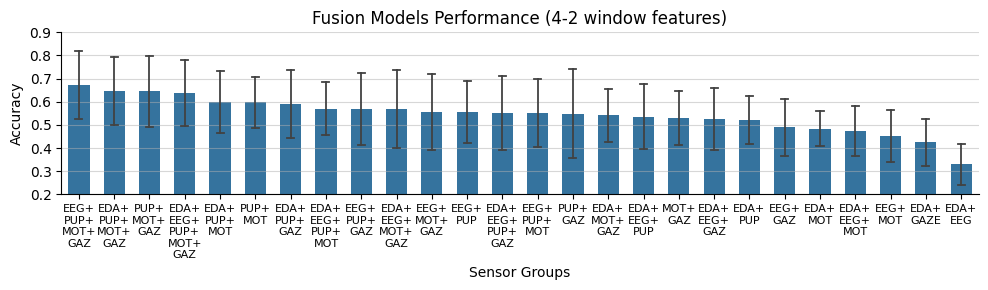

In [94]:
OUTPUT = 1

order = result.group.unique()
w=0.6

_, ax =plt.subplots(figsize=(10,3))

order = mm[mm.score == 'Accuracy'][['value', 'group']].groupby('group')['value'].mean().sort_values(ascending=False).index

sns.barplot(data=mm[mm.score == 'Accuracy'], x='group', y='value', order=order,
            gap=0,ax=ax, errorbar='sd', width=w, saturation=0.7, capsize=0.2, err_kws={'linewidth': 1.3})

ax.grid(axis='y', alpha=0.5)
ax.set_ylim(0.3,)
ax.set_xlabel('Sensor Groups')
ax.set_ylabel('Accuracy')
ax.legend().remove()
ax.set_yticks(np.arange(0.2, 1, 0.1))
ax.set_title('Fusion Models Performance (4-2 window features)')
sns.despine(ax=ax, top=True, right=True)

plt.xticks(fontsize=8)
plt.tight_layout()

if OUTPUT:
    plt.savefig('images/classification_fusion_6_42_accuracy.pdf', bbox_inches='tight')
plt.show()

/tmp/ipykernel_48394/3078843341.py:14: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  ax.legend().remove()


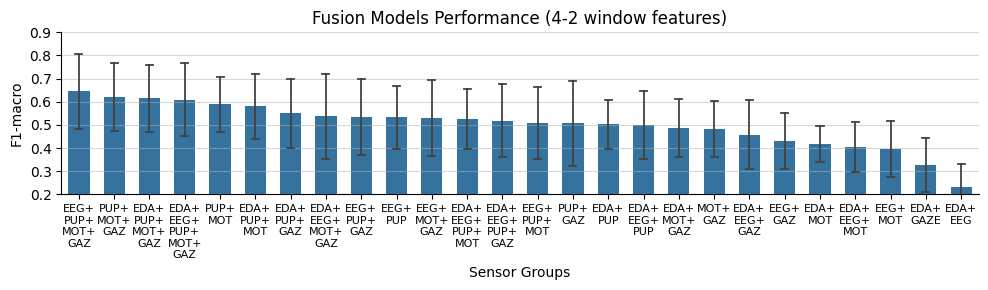

In [95]:
OUTPUT = 1
w=0.6

_, ax =plt.subplots(figsize=(10,3))

order = mm[mm.score == 'F1-macro'][['value', 'group']].groupby('group')['value'].mean().sort_values(ascending=False).index

sns.barplot(data=mm[mm.score == 'F1-macro'], x='group', y='value', order=order,
            gap=0, ax=ax, errorbar='sd', width=w, saturation=0.7, capsize=0.2, err_kws={'linewidth': 1.3})
ax.grid(axis='y', alpha=0.5)
ax.set_ylim(0.3,)
ax.set_xlabel('Sensor Groups')
ax.set_ylabel('F1-macro')
ax.legend().remove()
ax.set_yticks(np.arange(0.2, 1, 0.1))
ax.set_title('Fusion Models Performance (4-2 window features)')
sns.despine(ax=ax, top=True, right=True)
plt.xticks(fontsize=8)
plt.tight_layout()

if OUTPUT:
    plt.savefig('images/classification_fusion_6_42_f1.pdf', bbox_inches='tight')
plt.show()